In [186]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Circle
import numpy as np

In [187]:
G1 = nx.MultiDiGraph()

In [188]:
G1

In [189]:
G1.add_node(1, name="A")
G1.add_node(2, name="B")
G1.add_node(3, name="C")
G1.add_node(4, name="D")
G1.add_node(5, name="E")
G1.add_node(6, name="F")
G1.add_node(7, name="G")
G1.add_node(8, name="H")
G1.add_node(9, name="I")
G1.add_node(10, name="J")
G1.add_node(11, name="K")


In [190]:
G1.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11))

In [191]:
G1.add_edge(1, 2, weight=2.0, color='blue')
G1.add_edge(2, 1, weight=8.0, color='red')
G1.add_edge(3, 1, weight=5.0, color='blue')
G1.add_edge(4,6, weight=1.0, color='red')
G1.add_edge(3,5, weight=2.0, color='blue')
G1.add_edge(6,3, weight=3.0, color='red')
G1.add_edge(7,8, weight=4.0, color='blue')
G1.add_edge(7,1, weight=5.0, color='red')
G1.add_edge(9,10, weight=6.0, color='blue')
G1.add_edge(10,11, weight=7.0, color='red')
G1.add_edge(2,11, weight=8.0, color='blue')
G1.add_edge(2, 2, weight=1.0, color='red')

0

In [176]:
G1.edges()

OutMultiEdgeDataView([(1, 2), (2, 1), (2, 2), (2, 11), (3, 1), (3, 5), (4, 6), (6, 3), (7, 8), (7, 1), (9, 10), (10, 11)])

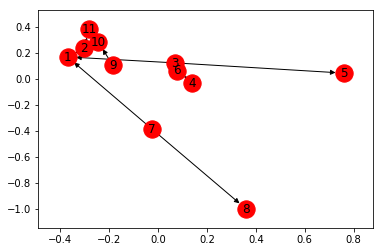

In [105]:

nx.draw_networkx(G1, pos)

In [106]:
for n1,n2,attr in G1.edges(data=True):
    print n1,n2,attr['weight']

1 2 2.0
2 1 8.0
2 2 1.0
2 11 8.0
3 1 5.0
3 5 2.0
4 6 1.0
6 3 3.0
7 8 4.0
7 1 5.0
9 10 6.0
10 11 7.0


{1: Text(1,-1.62558e-08,'1'),
 2: Text(0.841254,0.540641,'2'),
 3: Text(0.415415,0.909632,'3'),
 4: Text(-0.142315,0.989821,'4'),
 5: Text(-0.654861,0.75575,'5'),
 6: Text(-0.959493,0.281733,'6'),
 7: Text(-0.959493,-0.281733,'7'),
 8: Text(-0.654861,-0.75575,'8'),
 9: Text(-0.142315,-0.989821,'9'),
 10: Text(0.415415,-0.909632,'10'),
 11: Text(0.841253,-0.540641,'11')}

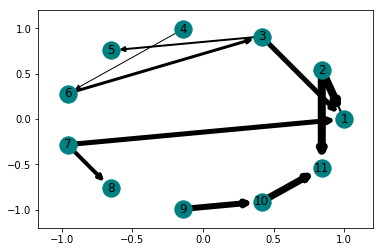

In [107]:
pos = nx.shell_layout(G1)
nx.draw_networkx_nodes(G1, pos, node_color='teal')
weights = [attr['weight'] for n1, n2, attr in G1.edges(data=True)]
nx.draw_networkx_edges(G1, pos, width=weights)
nx.draw_networkx_labels(G1, pos)

{1: Text(-0.35174,-0.188621,'1'),
 2: Text(-0.210993,-0.274058,'2'),
 3: Text(0.0691438,-0.071645,'3'),
 4: Text(-0.0251431,0.17219,'4'),
 5: Text(0.735463,0.111706,'5'),
 6: Text(0.044919,0.0164936,'6'),
 7: Text(-0.117106,0.374982,'7'),
 8: Text(0.151267,1,'8'),
 9: Text(-0.173464,-0.33266,'9'),
 10: Text(-0.0830124,-0.371816,'10'),
 11: Text(-0.0393339,-0.436573,'11')}

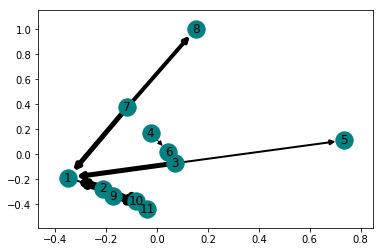

In [108]:
pos = nx.spring_layout(G1)
nx.draw_networkx_nodes(G1, pos, node_color='teal')
weights = [attr['weight'] for n1, n2, attr in G1.edges(data=True)]
nx.draw_networkx_edges(G1, pos, width=weights)
nx.draw_networkx_labels(G1, pos)

In [207]:
def draw_network(G,pos,ax,sg=None):
    for n in G:
        c=Circle(pos[n],radius=0.02,alpha=0.5, color='green')
        label = ax.annotate(G.node[n]['name'], pos[n], fontsize=10, ha="center")
        ax.add_patch(c)
        G.node[n]['patch']=c
        x,y=pos[n]
    seen={}
    for (u,v,d) in G.edges(data=True):
        n1=G.node[u]['patch']
        n2=G.node[v]['patch']
        rad=0.1
        if (u,v) in seen:
            rad=seen.get((u,v))
            rad=(rad+np.sign(rad)*0.1)*-1
        alpha=0.5
        color=d['color']
        
        print d['weight'], hasattr(G[u][v], 'weight')

        e = FancyArrowPatch(n1.center,n2.center,patchA=n1,patchB=n2,
                            arrowstyle='-|>',
                            connectionstyle='arc3,rad=%s'%rad,
                            mutation_scale=10.0,
                            lw=d['weight'],
                            alpha=alpha,
                            color=color)
        seen[(u,v)]=rad
        ax.add_patch(e)
    return e

2.0 False
8.0 False
1.0 False
8.0 False
5.0 False
2.0 False
1.0 False
3.0 False
4.0 False
5.0 False
6.0 False
7.0 False


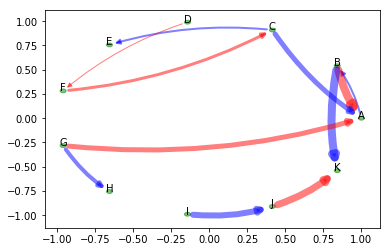

In [208]:
pos = nx.shell_layout(G1)
ax = plt.gca()
draw_network(G1, pos, plt.gca())

ax.autoscale()

In [204]:
for n, attr in G1.nodes(data=True):
    print n, attr

1 {'name': 'A'}
2 {'name': 'B'}
3 {'name': 'C'}
4 {'name': 'D'}
5 {'name': 'E'}
6 {'name': 'F'}
7 {'name': 'G'}
8 {'name': 'H'}
9 {'name': 'I'}
10 {'name': 'J'}
11 {'name': 'K'}


In [201]:
for n1, n2, attr in G1.edges(data=True):
    print n1, n2, attr

1 2 {'color': 'blue', 'weight': 2.0}
2 1 {'color': 'red', 'weight': 8.0}
2 2 {'color': 'red', 'weight': 1.0}
2 11 {'color': 'blue', 'weight': 8.0}
3 1 {'color': 'blue', 'weight': 5.0}
3 5 {'color': 'blue', 'weight': 2.0}
4 6 {'color': 'red', 'weight': 1.0}
6 3 {'color': 'red', 'weight': 3.0}
7 8 {'color': 'blue', 'weight': 4.0}
7 1 {'color': 'red', 'weight': 5.0}
9 10 {'color': 'blue', 'weight': 6.0}
10 11 {'color': 'red', 'weight': 7.0}


In [206]:
for n in G1:
    print G1.nodes[n]['name']

A
B
C
D
E
F
G
H
I
J
K
